In [3]:
import fastbook
fastbook.setup_book()
     

#hide
from fastbook import *

In [39]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(128)
    
)

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)



epoch,train_loss,valid_loss,error_rate,time
0,0.358746,0.159412,0.060217,01:24


epoch,train_loss,valid_loss,error_rate,time
0,0.160386,0.083071,0.027740,01:54


<Axes: >

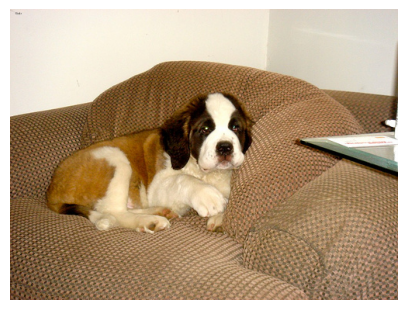

In [40]:
img = PILImage.create('g:/projects/machine_learning/deep_learning/fastaicourse/dog.jpg')
img.show()


In [41]:
from fastai.vision.widgets import *
uploader = widgets.FileUpload()
uploader


FileUpload(value=(), description='Upload')

This is a: True.
Probability it is a cat: 0.9546


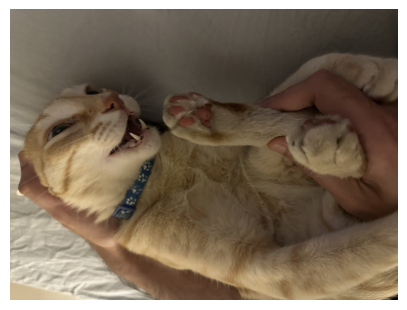

In [45]:
from io import BytesIO

img = PILImage.create(BytesIO(uploader.value[0]['content']))
img.show()

is_cat,_,probs = learn.predict(img)
print(f"This is a: {is_cat}.")
print(f"Probability it is a cat: {probs[1]:.4f}")

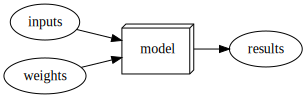

In [44]:
#hide_input
#caption A program using weight assignment
#id weight_assignment
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

In [46]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.900866,2.344801,00:07


epoch,train_loss,valid_loss,time
0,1.805177,1.541319,00:07
1,1.528134,1.425820,00:07
2,1.425296,1.170724,00:07
3,1.284213,0.992242,00:07
4,1.146651,0.863037,00:07
5,1.028540,0.814496,00:07
6,0.934169,0.794977,00:07
7,0.861479,0.786084,00:07


In [ ]:
from fastai.text.all import *

path = untar_data(URLs.IMDB)
dls = TextDataLoaders.from_folder(path, valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck


epoch,train_loss,valid_loss,accuracy,time
0,0.469966,0.397286,0.822520,24:10


epoch,train_loss,valid_loss,accuracy,time


c:\Users\Nitin\miniconda3\Lib\site-packages\fastai\learner.py:450: SyntaxWarning: invalid escape sequence '\R'
  e.args = [f"Custom classes or functions exported with your `Learner` not available in namespace.\Re-declare/import before loading:\n\t{e.args[0]}"]


KeyboardInterrupt: 

: 

ERROR:root:No traceback has been produced, nothing to debug.
